# Определение перспективного тарифа для телеком компании

## Описание проекта
Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Описание тарифов
**Тариф «Смарт»**
* Ежемесячная плата: 550 рублей
* Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
* минута разговора: 3 рубля
* сообщение: 3 рубля
* 1 Гб интернет-трафика: 200 рублей

**Тариф «Ультра»**
* Ежемесячная плата: 1950 рублей
* Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
* минута разговора: 1 рубль
* сообщение: 1 рубль
* 1 Гб интернет-трафика: 150 рублей

**Обратите внимание:** «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

## Описание данных

### Таблица users (информация о пользователях):
* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* tariff — название тарифного плана

### Таблица calls (информация о звонках):
* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок

### Таблица messages (информация о сообщениях):
* id — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение

### Таблица internet (информация об интернет-сессиях):
* id — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя

### Таблица tariffs (информация о тарифах):
* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со * 101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

## Цели проекта
Проверка гипотез:
* средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

<a id = 'Оглавление'></a>
## Оглавление:
* [Шаг 1. Изучение общей информации](#Шаг1)
* [Шаг 2. Подготовка данных](#Шаг2)
* [Шаг 3. Анализ данных](#Шаг3)
* [Шаг 4. Проверка гипотез](#Шаг4)
* [Шаг 5. Общий вывод](#Шаг5)


<a id='Шаг1'></a>
# Шаг 1. Изучение общей информации

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
import pylab 

In [65]:
df_calls = pd.read_csv('/datasets/calls.csv')
df_internet = pd.read_csv('/datasets/internet.csv')
df_messages = pd.read_csv('/datasets/messages.csv')
df_tariffs = pd.read_csv('/datasets/tariffs.csv')
df_users = pd.read_csv('/datasets/users.csv')

In [66]:
dict_df = {
    'calls': df_calls,
    'internet': df_internet,
    'messages': df_messages,
    'tariffs': df_tariffs,
    'users': df_users
}
#[df_calls, df_internet, df_messages, df_tariffs, df_users]

In [67]:
for k, df in dict_df.items():
    print('------------')
    print('\033[1m' + k + '\033[0m')
    display(df.head())

------------
calls


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


------------
internet


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


------------
messages


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


------------
tariffs


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


------------
users


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [68]:
for k, df in dict_df.items():
    print('------------')
    print('\033[1m' + k + '\033[0m')
    display(df.info())

------------
calls
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

------------
internet
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

------------
messages
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

------------
tariffs
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

------------
users
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

In [69]:
print(df_calls.call_date.min())
print(df_calls.call_date.max())

2018-01-01
2018-12-31


* Пропуски есть только в таблице "Пользователи" в признаке `churn_date` - дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* Для некорых признаков можно изменить тип данных. Например, для reg_date подойдет datetime
* Данные собраны за 2018 год

[Оглавление](#Оглавление)
<a id='Шаг2'></a>
# Шаг 2. Подготовка данных

## Цель шага:
* **Провести чистку и неободимые преобразования данных**
* **Получить информацию об активности клиентов по месяцам**

Все даты преобразую в тип *datetime*

Так как все потраченные минуты и мегабайты округляются вверх до целых значений, преобразую их в тип *int*

In [70]:
df_calls['call_date'] = df_calls['call_date'].astype('datetime64')
df_internet['session_date'] = df_internet['session_date'].astype('datetime64')
df_messages['message_date'] = df_messages['message_date'].astype('datetime64') 
df_users['reg_date'] = df_users['reg_date'].astype('datetime64')
df_users.loc[df_users.churn_date.isna() == False, 'churn_date'] = df_users.loc[df_users.churn_date.isna() == False, 
                                                                                   'churn_date'].astype('datetime64')

In [71]:
df_calls['duration'] = df_calls['duration'].apply(lambda x: math.ceil(x))
df_internet['mb_used'] = df_internet['mb_used'].apply(lambda x: math.ceil(x))

In [72]:
# тут видно, как округлилась длительность телефонных разговоров

df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


In [73]:
for k, df in dict_df.items():
    print('------------')
    print('\033[1m' + k + '\033[0m')
    print(df.dtypes)

------------
calls
id                   object
call_date    datetime64[ns]
duration              int64
user_id               int64
dtype: object
------------
internet
Unnamed: 0               int64
id                      object
mb_used                  int64
session_date    datetime64[ns]
user_id                  int64
dtype: object
------------
messages
id                      object
message_date    datetime64[ns]
user_id                  int64
dtype: object
------------
tariffs
messages_included         int64
mb_per_month_included     int64
minutes_included          int64
rub_monthly_fee           int64
rub_per_gb                int64
rub_per_message           int64
rub_per_minute            int64
tariff_name              object
dtype: object
------------
users
user_id                int64
age                    int64
churn_date            object
city                  object
first_name            object
last_name             object
reg_date      datetime64[ns]
tariff                

### Рассмотрим данные подробнее:

Построим гистограмму распределения продолжительности телефонный звонков

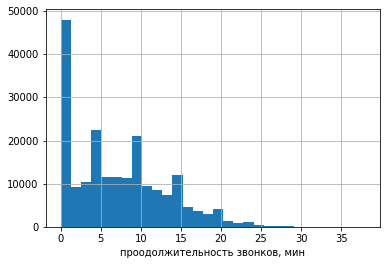

In [74]:
df_calls.duration.hist(bins=30)
plt.xlabel('проодолжительность звонков, мин')
plt.show()

In [75]:
print ('\033[1m' + 'Количество строк с нулевым значением:' + '\033[0m')
df_calls.query('duration == 0').duration.count()

Количество строк с нулевым значением:


39613

В таблице с телефонными звонками есть строки с продолжительностью вызова равной нулю. Эти данные могут сильно повлиять на значение средного, медианы и т.д. Кроме того, такие вызовы не приносят компании доход, и не представляют ценности в данном исследовании.

Предположу, что если в разных тарифах процент таких вызовов примерно одинаковый, их можно удалить

In [76]:
(
    df_calls
    .merge(df_users[['user_id', 'tariff']], left_on='user_id', right_on='user_id', suffixes=('_left', '_right'))
    .query('duration == 0')
    .groupby(by='tariff')
    .id
    .count()
    /
    df_calls
    .merge(df_users[['user_id', 'tariff']], left_on='user_id', right_on='user_id', suffixes=('_left', '_right'))
    .groupby(by='tariff')
    .id
    .count()
)


tariff
smart    0.196977
ultra    0.192884
Name: id, dtype: float64

Процент почти совпадает, поэтому думаю можно не использовать строки с продолжительность вызова равной 0 в исследовании. Создадим новый датафрейм для дальнейшей работы.

In [77]:
df_calls_no_zero = df_calls.query('duration != 0')

Рассмотрим размер интернет трафика за сессию:

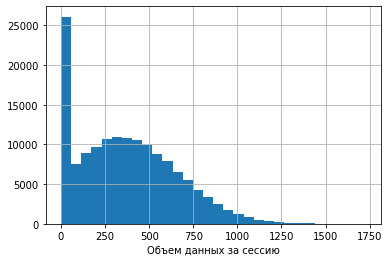

Количество строк с нулевым значением:


19598

In [78]:
df_internet.mb_used.hist(bins=30)
plt.xlabel('Объем данных за сессию')
plt.show()
print ('\033[1m' + 'Количество строк с нулевым значением:' + '\033[0m')
df_internet.query('mb_used == 0').mb_used.count()

Эти строки тоже стоит удалить, так как они не представляют интереса и скорее всего являются технической ошибкой.

In [79]:
df_internet_no_zero = df_internet.query('mb_used != 0')

Теперь рассчитаем сколько минут, сообщений и интернет трафика тратят пользователи в течение месяца. Для этого сгруппируем датафремы по `user_id` и месяцам.

In [80]:
call_groups = df_calls_no_zero.groupby(['user_id', df_calls_no_zero.call_date.dt.month])['duration'].agg(['count', 'sum'])
message_groups = df_messages.groupby(['user_id', df_messages.message_date.dt.month])['id'].count()
internet_groups = df_internet_no_zero.groupby(['user_id', df_internet_no_zero.session_date.dt.month])['mb_used'].sum()
# посмотрим что сохранилось в переменную call_groups
call_groups

count  sum
user_id call_date            
1000    5             17  159
        6             28  172
        7             41  340
        8             42  408
        9             46  466
...                  ...  ...
1498    10            30  247
1499    9              8   70
        10            44  449
        11            62  612
        12            56  492

[3168 rows x 2 columns]

Соберем полученные данные в один датафрейм `df_users_month`.

In [81]:
df_users_month = pd.DataFrame({'calls_duration': call_groups['sum'], 
                          'calls_count': call_groups['count'], 
                          'messages_count': message_groups,
                          'internet_traffic': internet_groups
                         })
df_users_month.index.names = ['user_id', 'month']
df_users_month

calls_duration  calls_count  messages_count  internet_traffic
user_id month                                                               
1000    5               159.0         17.0            22.0            2256.0
        6               172.0         28.0            60.0           23257.0
        7               340.0         41.0            75.0           14016.0
        8               408.0         42.0            81.0           14070.0
        9               466.0         46.0            57.0           14581.0
...                       ...          ...             ...               ...
1498    10              247.0         30.0            42.0           20604.0
1499    9                70.0          8.0            11.0            1848.0
        10              449.0         44.0            48.0           17809.0
        11              612.0         62.0            59.0           17984.0
        12              492.0         56.0            66.0           13077.0

[3214 rows x 4 columns]

In [82]:
print ('\033[1m' + 'Процент пропусков' + '\033[0m')
df_users_month.isna().mean()

Процент пропусков


calls_duration      0.014312
calls_count         0.014312
messages_count      0.154636
internet_traffic    0.004045
dtype: float64

В полученном датафрейме много пропусков. Можно сделать вывод, что многие пользователи редко пользуются текстовыми сообщениями, но практически все используют интернет.

Разделим полученный датафрейм на два новых датафрейма в зависимости от тарифа.

In [83]:
# создадим список пользователей для каждого тарифа
list_user_id_ultra = df_users.query('tariff == "ultra"').user_id
list_user_id_smart = df_users.query('tariff == "smart"').user_id
# на основе созданных списков отфильтруем записи
df_users_month_ultra = df_users_month.query('user_id in @list_user_id_ultra')
df_users_month_smart = df_users_month.query('user_id in @list_user_id_smart')

Добавим в датафреймы новые признаки:
* `over_minutes` - превышение расхода минут
* `over_messages` - превышение расхода сообщений
* `over_internet` - превышение расхода интернет трафика (МБ)
* `over_internet_gd` - превышение расхода интернет трафика (ГБ)
* `over_payment` - дополнительный платеж
* `total_payment` - общий платеж

In [84]:
t_smart = {
    'payment': 550,
    'minutes': 500,
    'messages': 50,
    'internet': 15*1024,
    'over_minutes_cost': 3,
    'over_messages_cost': 3,
    'over_internet_cost': 200
}

t_ultra = {
    'payment': 1950,
    'minutes': 3000,
    'messages': 1000,
    'internet': 30*1024,
    'over_minutes_cost': 1,
    'over_messages_cost': 1,
    'over_internet_cost': 150
}

def create_payment(df, tariff):
    df['over_minutes'] = df['calls_duration'] - tariff['minutes']
    df['over_messages'] = df['messages_count'] - tariff['messages']
    df['over_internet'] = df['internet_traffic'] - tariff['internet']
    
    for column in ['over_minutes', 'over_messages', 'over_internet']:
        df[column] = df[column].fillna(0)
        df.loc[df[column] < 0, column] = 0
        
    df['over_internet_gd'] = df['over_internet'].apply(lambda x: math.ceil(x / 1024))
    
    df['over_payment'] = (df['over_minutes'] * tariff['over_minutes_cost'] 
                          + df['over_messages'] * tariff['over_messages_cost'] 
                          + df['over_internet_gd'] * tariff['over_internet_cost']
                         )
    df['total_payment'] = df['over_payment'] + tariff['payment']

In [85]:
create_payment(df_users_month_ultra, t_ultra)
create_payment(df_users_month_smart, t_smart)
df_users_month_smart

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/

calls_duration  calls_count  messages_count  internet_traffic  \
user_id month                                                                  
1001    11              430.0         45.0             NaN           18452.0   
        12              414.0         47.0             NaN           14053.0   
1002    6               117.0         14.0             4.0           10871.0   
        7               214.0         21.0            11.0           17601.0   
        8               289.0         37.0            13.0           20347.0   
...                       ...          ...             ...               ...   
1498    10              247.0         30.0            42.0           20604.0   
1499    9                70.0          8.0            11.0            1848.0   
        10              449.0         44.0            48.0           17809.0   
        11              612.0         62.0            59.0           17984.0   
        12              492.0         56.0            66.0           13077.0   

               over_minutes  over_messages  over_internet  over_internet_gd  \
user_id month                                                                 
1001    11              0.0            0.0         3092.0                 4   
        12              0.0            0.0            0.0                 0   
1002    6               0.0            0.0            0.0                 0   
        7               0.0            0.0         2241.0                 3   
        8               0.0            0.0         4987.0                 5   
...                     ...            ...            ...               ...   
1498    10              0.0            0.0         5244.0                 6   
1499    9               0.0            0.0            0.0                 0   
        10              0.0            0.0         2449.0                 3   
        11            112.0            9.0         2624.0                 3   
        12              0.0           16.0            0.0                 0   

               over_payment  total_payment  
user_id month                               
1001    11            800.0         1350.0  
        12              0.0          550.0  
1002    6               0.0          550.0  
        7             600.0         1150.0  
        8            1000.0         1550.0  
...                     ...            ...  
1498    10           1200.0         1750.0  
1499    9               0.0          550.0  
        10            600.0         1150.0  
        11            963.0         1513.0  
        12             48.0          598.0  

[2229 rows x 10 columns]

## Вывод
* для некоторых признаков были изменены типы данных, 
* были удалены строки с нулевыми значениями продолжительности звонков и объема интернет сессий,
* былы созданы два датафрейма с информацией о тратах пользователей по месяцам 

[Оглавление](#Оглавление)
<a id='Шаг3'></a>
# Шаг 3. Анализ данных

## Цель шага:
* **Подробнее изучить данные о расходе минут, СМС и Мб клиентами разных тарифов**

На прошлом шаге мы создали два отдельных датафрейма для каждого тарифа. К сожалению, тогда я не подумал, что для создания графиков будет удобнее ипользовать один датафрейм. Поэтому я объединю `df_users_month_smart` и `df_users_month_ultra` в новый датафрейм `df_users_month_total`.

In [86]:
df_users_month_smart['tariff'] = 'smart'
df_users_month_ultra['tariff'] = 'ultra'
df_users_month_total = pd.concat([df_users_month_smart, df_users_month_ultra])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [87]:
# функция для создания графиков боксплот

def create_boxplot_tariff(figsize, x, y, limit_s, limit_u, ylabel, title):
        
    plt.figure(figsize=figsize)
    sns.boxplot(x= x, y = y)
    if limit_u != 0:
        plt.plot([0, 1.5], [limit_u, limit_u], color = 'red')
        plt.text(0, limit_u, 'Предел для тарифа УЛЬТРА')
    if limit_s != 0:      
        plt.plot([-1, 0.5], [limit_s, limit_s], color = 'red')
        plt.text(-1, limit_s, 'Предел для тарифа СМАРТ')
    plt.xlabel('Тариф')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

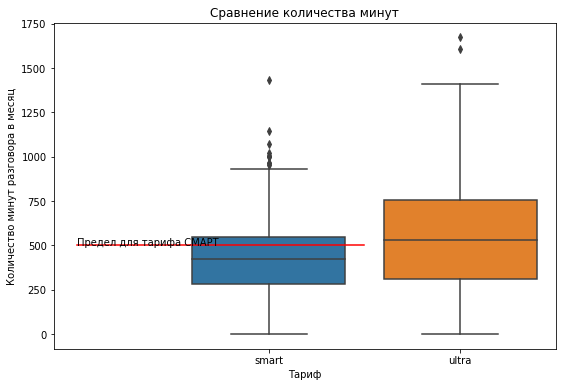

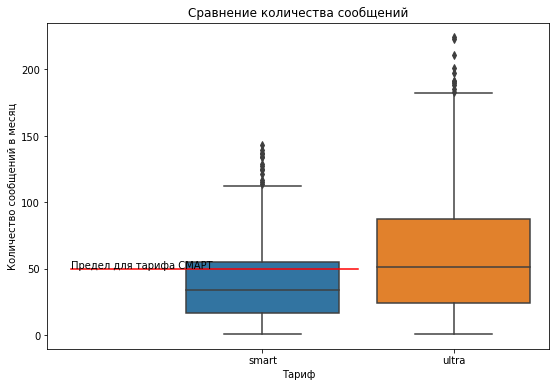

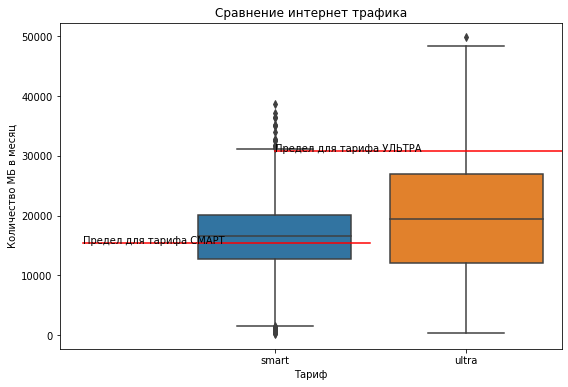

In [88]:
create_boxplot_tariff((9,6), df_users_month_total.tariff, df_users_month_total.calls_duration, 500, 0, 'Количество минут разговора в месяц', 'Сравнение количества минут')
create_boxplot_tariff((9,6), df_users_month_total.tariff, df_users_month_total.messages_count, 50, 0, 'Количество сообщений в месяц', 'Сравнение количества сообщений')
create_boxplot_tariff((9,6), df_users_month_total.tariff, df_users_month_total.internet_traffic, 15*1024, 30*1024, 'Количество МБ в месяц', 'Сравнение интернет трафика')

На первых двух графиках нет лимита для тарифа УЛЬТРА, так как он сильно выше имеющихся значений. Если добавить его на график, информативность уменьшится (либо придется увеличить размер графика).

In [89]:
(
    df_users_month_total.groupby('tariff')['calls_duration', 'messages_count', 'internet_traffic']
    .agg(['mean', 'var', 'std'])
    .style.format('{:.2f}')
)

По графикам и таблице выше можно сделать выводы:
* Распределение данных похоже на распрделение Пуассона.
* Пользователям тарифа СМАРТ в среднем не хватает интернета, а минут и сообщений в среднем хватает. При этом есть пользователи, которые вообще не используют интернет.
* В тариф УЛЬТРА входит огромное количество минут и сообщений; ни один пользователь не смог достичь лимита. В среднем интернет трафика достаточно, однако некоторым пользователям не хватает (их меньше 25% от общего числа пользователей этого тарифа).
_______________
Теперь рассмотрим те же данные, но без детализации по месяцам. Для каждого пользователя посчитаем среднее количество потраченных минут, сообщений, трафика, платежей

In [90]:
df_users_total = df_users_month_total.reset_index()
df_users_mean = df_users_total.fillna(0).groupby('user_id')[['calls_duration', 
                                                             'messages_count', 
                                                             'internet_traffic', 
                                                             'over_payment', 
                                                             'total_payment']].mean()

df_users_mean = df_users_mean.merge(df_users[['user_id', 'tariff']], left_on='user_id', right_on='user_id')
df_users_mean

,user_id,calls_duration,messages_count,internet_traffic,over_payment,total_payment,tariff
0,1000,320.750000,62.0,13436.500000,0.000000,1950.000000,ultra
1,1001,422.000000,0.0,16252.500000,400.000000,950.000000,smart
2,1002,216.714286,10.0,16597.571429,485.714286,1035.714286,smart
3,1003,764.400000,76.0,11465.800000,0.000000,1950.000000,ultra
4,1004,123.375000,149.0,18646.500000,0.000000,1950.000000,ultra
...,...,...,...,...,...,...,...
493,1495,784.000000,68.0,25507.200000,360.000000,2310.000000,ultra
494,1496,498.666667,39.0,22605.750000,1829.250000,2379.250000,smart
495,1497,468.666667,17.0,15208.666667,378.333333,928.333333,smart
496,1498,323.250000,42.0,18631.500000,1109.000000,1659.000000,smart


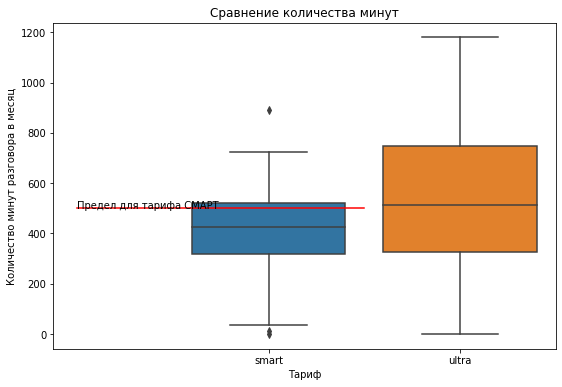

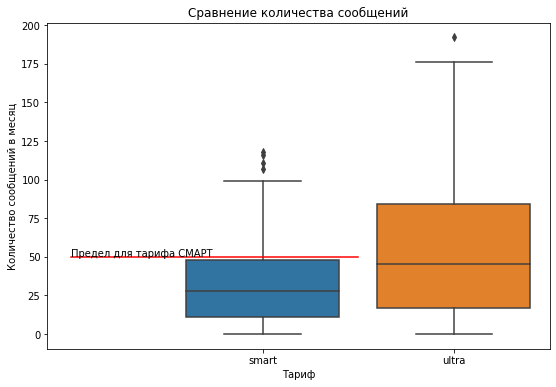

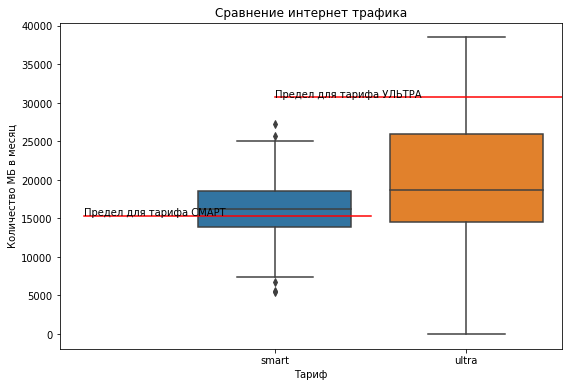

In [91]:
df_users_mean = df_users_mean.sort_values('tariff')
create_boxplot_tariff((9,6), df_users_mean.tariff, df_users_mean.calls_duration, 500, 0, 'Количество минут разговора в месяц', 'Сравнение количества минут')
create_boxplot_tariff((9,6), df_users_mean.tariff, df_users_mean.messages_count, 50, 0, 'Количество сообщений в месяц', 'Сравнение количества сообщений')
create_boxplot_tariff((9,6), df_users_mean.tariff, df_users_mean.internet_traffic, 15*1024, 30*1024, 'Количество МБ в месяц', 'Сравнение интернет трафика')

In [92]:
pd.concat([
    (
        df_users_month_total.groupby('tariff')['calls_duration', 'messages_count', 'internet_traffic']
        .agg(['mean', 'std'])
    )
    ,
    (
        df_users_mean.groupby('tariff')['calls_duration', 'messages_count', 'internet_traffic']
        .agg(['mean', 'std'])
    )],
         keys = ['С детализацией по месяцам', 'Без детализации по месяцам']
    ).style.format('{:.2f}')


По графикам особой разницы в данных не видно, выводы совпадают с предыдущими. По таблице можно сказать, что сильно уменьшилось стандартное отклонение, средние значения сильно уменьшились только в количестве сообщений, в остальном все примерно также.

### Вывод:
* Распределение данных похоже на распрделение Пуассона.
* Пользователям тарифа СМАРТ в среднем не хватает интернета, а минут и сообщений в среднем хватает. При этом есть пользователи, которые вообще не используют интернет.
* В тариф УЛЬТРА входит огромное количество минут и сообщений; ни один пользователь не смог достичь лимита. В среднем интернет трафика достаточно, однако некоторым пользователям не хватает (их меньше 25% от общего числа пользователей этого тарифа).
* Если рассматривать средние значения трат для пользователей без привязки к месяцам, можно заметно уменьшить стандартное отклонение

   
Рассмотрим рапределение выручки и клиентов между тарифами:

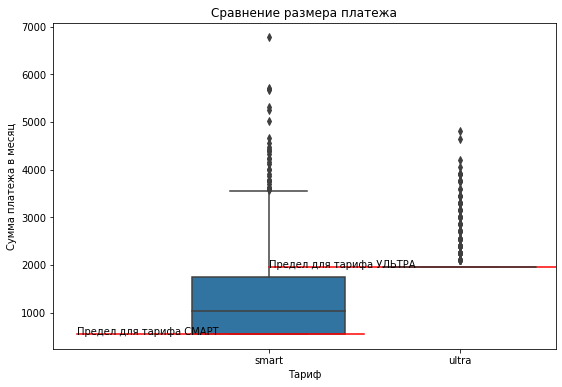

In [93]:
create_boxplot_tariff((9,6), df_users_month_total.tariff, df_users_month_total.total_payment, 550, 1950, 'Сумма платежа в месяц', 'Сравнение размера платежа')

In [94]:
print('Количество месячных платежей за год по каждому тарифу:')
df_users_month_total.groupby('tariff').total_payment.count()

Количество месячных платежей за год по каждому тарифу:


tariff
smart    2229
ultra     985
Name: total_payment, dtype: int64

In [95]:
print('Количество пользователей по каждому тарифу:')
df_users.groupby('tariff').user_id.count()

Количество пользователей по каждому тарифу:


tariff
smart    351
ultra    149
Name: user_id, dtype: int64

**По графику видно, что:**
- среднее значение суммы ежемесячного платежа выше для тарифа УЛЬТРА
- платежи по тарифу СМАРТ чаще включают плату за дополнительные услуги (минут, сообщения, трафик)
- у тарифа СМАРТ больший процент платежей превышает 2000 рублей в месяц по сравнению с тарифом УЛЬТРА

Число платежей по тарифу СМАРТ в ~2.3 раза больше числа платежей по УЛЬТРА

[Оглавление](#Оглавление)
<a id='Шаг4'></a>

# Шаг 4. Проверка гипотез

## 1. Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различается

Предполагаю, что за тарифы установлена справедливая цена, в таком случае интерес вызывает размер переплат пользователей, поскольку от этого зависит доход. Сформулируем гипотезы:

- H0: средние значения переплат для пользователей разных тарифов равны.
- H1: средние значения переплат для пользователей разных тарифов не равны.

Оценим данные ежемесячных платежей клиентов детализированных по месяцам:

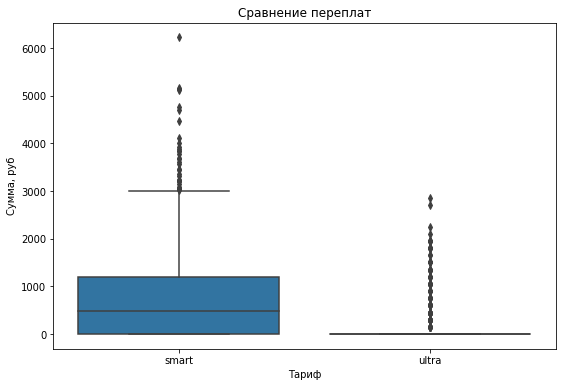

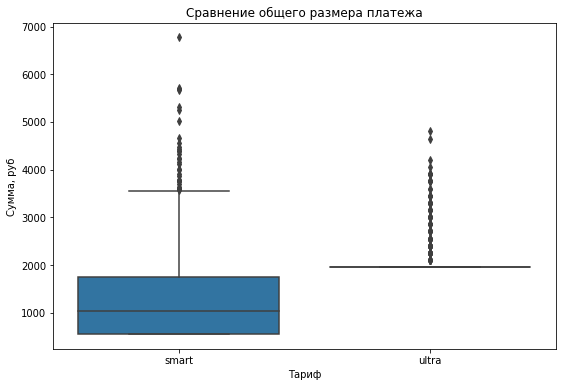

,over_payment,total_payment
,mean,mean
tariff,,
smart,744.64,1294.64
ultra,121.07,2071.07


In [96]:
create_boxplot_tariff((9,6), df_users_month_total.tariff, df_users_month_total.over_payment, 0, 0, 'Сумма, руб', 'Сравнение переплат')
create_boxplot_tariff((9,6), df_users_month_total.tariff, df_users_month_total.total_payment, 0, 0, 'Сумма, руб', 'Сравнение общего размера платежа')
df_users_month_total.reset_index().groupby('tariff')[['over_payment','total_payment']].agg(['mean']).style.format('{:.2f}')

Рассмотрим подробнее распределения признака `over_payment` 

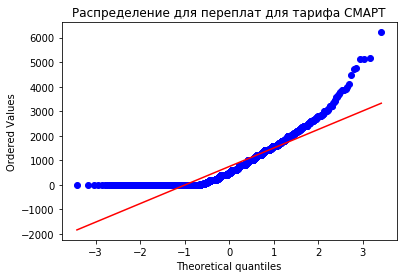

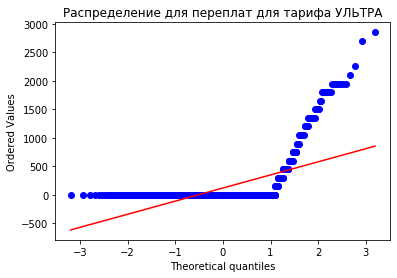

In [97]:
stats.probplot(df_users_month_smart.over_payment, dist="norm", plot=pylab)
plt.title('Распределение для переплат для тарифа СМАРТ')
plt.show()

stats.probplot(df_users_month_ultra.over_payment, dist="norm", plot=pylab)
plt.title('Распределение для переплат для тарифа УЛЬТРА')
plt.show()

Так как распределение не соответсвует нормальному, для проверки гипотизы о равенстве средних буду использовать критерий Манна-Уитни

In [98]:
stat, p = stats.mannwhitneyu(df_users_month_smart.over_payment, df_users_month_ultra.over_payment)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Не получилось отвергнуть нулевую гипотезу')
else:
    print('Отвергаем нулевую гипотезу')

Statistics=423447.000, p=0.000
Отвергаем нулевую гипотезу


Теперь рассмотрим данные по пользователям без детализации по месяцам:

In [99]:
df_users_mean.query('tariff == "ultra"')
df_users_mean.query('tariff == "smart"')

,user_id,calls_duration,messages_count,internet_traffic,over_payment,total_payment,tariff
248,1249,205.600000,22.0,13456.000000,200.000000,750.000000,smart
301,1302,204.083333,73.0,14630.166667,324.500000,874.500000,smart
300,1301,440.000000,0.0,16576.250000,1146.250000,1696.250000,smart
298,1299,420.666667,44.0,15033.416667,383.166667,933.166667,smart
297,1298,463.166667,28.0,19187.666667,1270.666667,1820.666667,smart
...,...,...,...,...,...,...,...
160,1161,289.800000,33.6,15472.800000,520.000000,1070.000000,smart
161,1162,187.666667,0.0,16466.333333,533.333333,1083.333333,smart
163,1164,326.000000,35.0,14669.666667,222.222222,772.222222,smart
14,1014,227.125000,44.0,23874.750000,1826.500000,2376.500000,smart


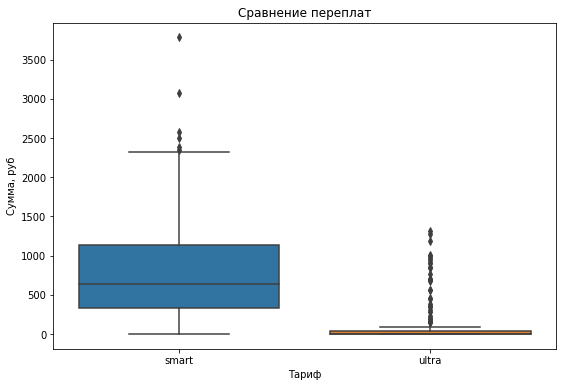

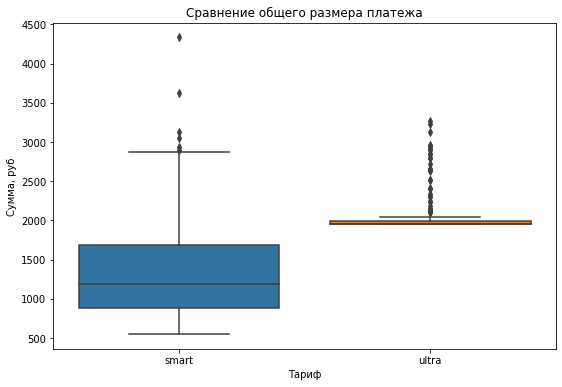

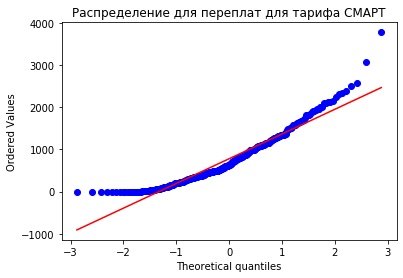

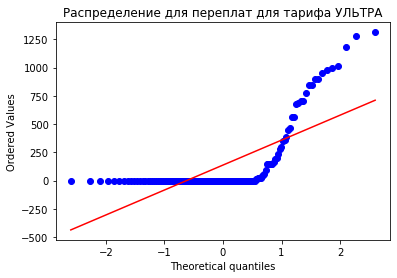

In [100]:
# графики boxplot
create_boxplot_tariff((9,6), df_users_mean.tariff, df_users_mean.over_payment, 0, 0, 'Сумма, руб', 'Сравнение переплат')
create_boxplot_tariff((9,6), df_users_mean.tariff, df_users_mean.total_payment, 0, 0, 'Сумма, руб', 'Сравнение общего размера платежа')
plt.show()
df_users_mean.reset_index().groupby('tariff')[['over_payment','total_payment']].agg(['mean', 'median'])

# графики qqplot
stats.probplot(df_users_mean.query('tariff == "smart"').over_payment, dist="norm", plot=pylab)
plt.title('Распределение для переплат для тарифа СМАРТ')
plt.show()
stats.probplot(df_users_mean.query('tariff == "ultra"').over_payment, dist="norm", plot=pylab)
plt.title('Распределение для переплат для тарифа УЛЬТРА')
plt.show()

In [101]:
# проверка гипотез
stat, p = stats.mannwhitneyu(df_users_mean.query('tariff == "smart"').over_payment, df_users_mean.query('tariff == "ultra"').over_payment)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Не получилось отвергнуть нулевую гипотезу')
else:
    print('Отвергаем нулевую гипотезу')

Statistics=6171.500, p=0.000
Отвергаем нулевую гипотезу


### Итог:
Отвергаю нулевую гипотезу о равенстве средних двух выборок
___


Проверю гипотезу о равенстве средних платежей для разных тарифов с детализацией по месяцам:

- H0: ежемесячные платежи для пользователей разных тарифов равны.
- H1: ежемесячные платежи для пользователей разных тарифов не равны.

Для сравнения буду использовать метод сравнения средних

In [102]:
# проверка гипотез
stat, p = stats.mannwhitneyu(df_users_month_total.query('tariff == "smart"').total_payment, df_users_month_total.query('tariff == "ultra"').total_payment)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Не получилось отвергнуть нулевую гипотезу')
else:
    print('Отвергаем нулевую гипотезу')

Statistics=402632.000, p=0.000
Отвергаем нулевую гипотезу


### Итог:
Отвергаю нулевую гипотезу о равенстве средних двух выборок
___


## 2. Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Сформулируем гипотезы:

- H0: средняя ежемесячная плата для пользователей из Москвы и регионов совпадает.
- H1: средняя ежемесячная плата для пользователей из Москвы и регионов не совпадает.

Проверим нет ли дублирующих названий в признаке `city`

In [103]:
sorted(df_users.city.unique())

['Архангельск',
 'Астрахань',
 'Балашиха',
 'Барнаул',
 'Белгород',
 'Брянск',
 'Владивосток',
 'Владикавказ',
 'Владимир',
 'Волгоград',
 'Волжский',
 'Вологда',
 'Воронеж',
 'Грозный',
 'Екатеринбург',
 'Иваново',
 'Ижевск',
 'Иркутск',
 'Казань',
 'Калининград',
 'Калуга',
 'Кемерово',
 'Киров',
 'Кострома',
 'Краснодар',
 'Красноярск',
 'Курган',
 'Курск',
 'Липецк',
 'Магнитогорск',
 'Махачкала',
 'Москва',
 'Мурманск',
 'Набережные Челны',
 'Нижневартовск',
 'Нижний Новгород',
 'Нижний Тагил',
 'Новокузнецк',
 'Новороссийск',
 'Новосибирск',
 'Омск',
 'Оренбург',
 'Орёл',
 'Пенза',
 'Пермь',
 'Петрозаводск',
 'Подольск',
 'Ростов-на-Дону',
 'Рязань',
 'Самара',
 'Санкт-Петербург',
 'Саранск',
 'Саратов',
 'Севастополь',
 'Смоленск',
 'Сочи',
 'Ставрополь',
 'Стерлитамак',
 'Сургут',
 'Тамбов',
 'Тверь',
 'Тольятти',
 'Томск',
 'Тула',
 'Тюмень',
 'Улан-Удэ',
 'Ульяновск',
 'Уфа',
 'Хабаровск',
 'Химки',
 'Чебоксары',
 'Челябинск',
 'Череповец',
 'Чита',
 'Якутск',
 'Ярославль']

В признаке `city` датафрейма `df_users` дублирующих наименований нет. Добавлю признак `city` в датафрейм `df_users_total`

In [104]:
df_users_total = df_users_total.merge(df_users[['user_id', 'city']], left_on='user_id', right_on='user_id', suffixes=('_left', '_right'))

Добавлю категориальный признак `region`

In [105]:
def check_region(x):
    if x == 'Москва':
        return 'Москва'
    return 'Регион'
df_users_total['region'] = df_users_total['city'].apply(check_region)

In [106]:
df_users_total

,user_id,month,calls_duration,calls_count,messages_count,internet_traffic,over_minutes,over_messages,over_internet,over_internet_gd,over_payment,total_payment,tariff,city,region
0,1001,11,430.0,45.0,NaN,18452.0,0.0,0.0,3092.0,4,800.0,1350.0,smart,Москва,Москва
1,1001,12,414.0,47.0,NaN,14053.0,0.0,0.0,0.0,0,0.0,550.0,smart,Москва,Москва
2,1002,6,117.0,14.0,4.0,10871.0,0.0,0.0,0.0,0,0.0,550.0,smart,Стерлитамак,Регион
3,1002,7,214.0,21.0,11.0,17601.0,0.0,0.0,2241.0,3,600.0,1150.0,smart,Стерлитамак,Регион
4,1002,8,289.0,37.0,13.0,20347.0,0.0,0.0,4987.0,5,1000.0,1550.0,smart,Стерлитамак,Регион
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1495,8,92.0,13.0,13.0,2616.0,0.0,0.0,0.0,0,0.0,1950.0,ultra,Иркутск,Регион
3210,1495,9,813.0,95.0,82.0,33105.0,0.0,0.0,2385.0,3,450.0,2400.0,ultra,Иркутск,Регион
3211,1495,10,1030.0,126.0,82.0,29393.0,0.0,0.0,0.0,0,0.0,1950.0,ultra,Иркутск,Регион
3212,1495,11,954.0,112.0,79.0,38972.0,0.0,0.0,8252.0,9,1350.0,3300.0,ultra,Иркутск,Регион


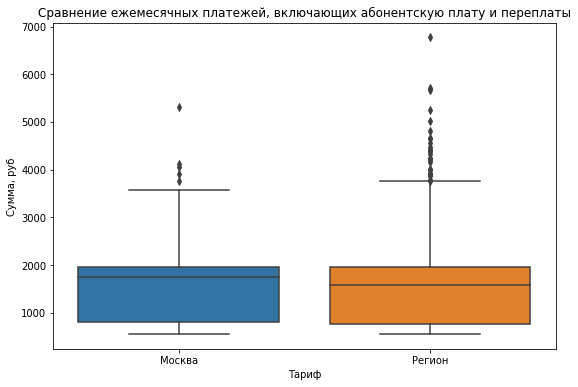

In [107]:
create_boxplot_tariff((9,6), 
                      df_users_total.region, 
                      df_users_total.total_payment,
                      0, 0, 'Сумма, руб', 'Сравнение ежемесячных платежей, включающих абонентскую плату и переплаты')

plt.show()

In [108]:
df_users_total.groupby('region')[['total_payment']].agg(['mean', 'std', 'var']).style.format('{:.2f}')

Москвичи всреднем больше платят за связь, при этом у них меньше отклонение от среднего.

Для проверки гипотезы буду использовать критерий Манна-Уитни:

In [109]:
stat, p = stats.mannwhitneyu(df_users_total.query('region == "Москва"').total_payment, df_users_total.query('region == "Регион"').total_payment)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Не получилось отвергнуть нулевую гипотезу')
else:
    print('Отвергаем нулевую гипотезу')

Statistics=777502.000, p=0.192
Не получилось отвергнуть нулевую гипотезу


### Итог:
Средняя ежемесячная плата для жителей Москвы и регионов совпадает.
___

## Вывод:
- В ходе проверки гипотез удалось опровергнуть гипотезу о равенстве средних расходов для групп пользователей с разными тарифами.
- В ходе проверки удалось подтвердить гипотезу о равенстве средних расходов для жителей Москвы и регионов.

[Оглавление](#Оглавление)
<a id='Шаг5'></a>
# Шаг 5. Общий вывод

- В ходе исследования мы узнали, что пользователи с тарифом "СМАРТ" часто превышают лимит минут и МБ. Это приводит к тому, что средний месячный счет в 2.4 раза превышает стоимость пакетных услуг.
- Пользователи с тарифом "УЛЬТРА" практически не переплачивают за связь
- В ходе проверки гипотез удалось опровергнуть гипотезу о равенстве средних расходов для групп пользователей с разными тарифами.
- В ходе проверки удалось подтвердить гипотезу о равенстве средних расходов для жителей Москвы и регионов.
